**Logistic Regression**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

In [47]:
data = np.loadtxt(r"C:\Users\ABHIJITH\Downloads\ex2data1.txt", delimiter=",")
x_train = data[:, 0:2]
y_train = data[:, 2]

In [48]:
print(x_train.shape,y_train.shape)
print(len(x_train))

(100, 2) (100,)
100


In [49]:
print(x_train[:5,:],y_train[:5])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]] [0. 0. 0. 1. 1.]


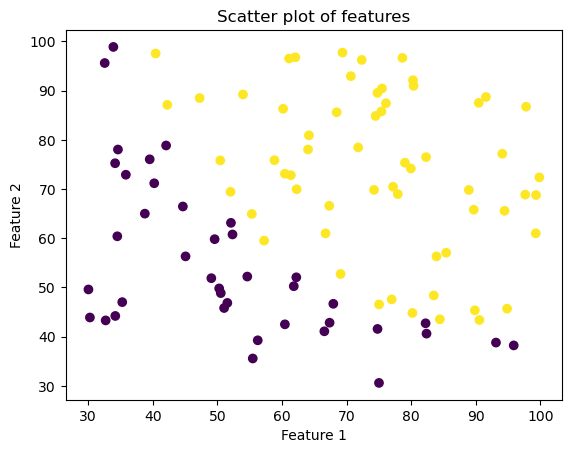

In [50]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of features')
plt.show()

In [51]:
#Sigmoid Function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [52]:
#Compute cost function

def compute_cost(x,y,w,b):
    m,n = x.shape
    cost = 0

    for i in range(m):
        z_i = np.dot(w,x[i]) + b
        f_wb_i = sigmoid(z_i)
        cost = cost + y[i]*np.log(f_wb_i) + (1-y[i])*np.log(1-f_wb_i)


    cost = -cost / m

    return cost

In [53]:
#Compute gradient

def compute_gradient(x,y,w,b):
    m,n = x.shape

    dj_dw = np.zeros(w.shape)
    dj_db = 0

    for i in range(m):
        z_i = np.dot(w,x[i]) + b
        f_wb_i = sigmoid(z_i)

        err = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw,dj_db



In [58]:
#Gradient descent

def gradient_descent(x,y,w_in,b_in,compute_cost,compute_gradient,alpha,num_iters):
    m= len(x)   

    j_history = []
    w_history = []

    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w_in,b_in)

        w_in = w_in - alpha*dj_dw
        b_in = b_in - alpha*dj_db

        if i < 100000:
            cost = compute_cost(x,y,w_in,b_in)
            j_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(j_history[-1]):8.2f}   ")

    return w_in,b_in,j_history,w_history

In [59]:
np.random.seed(1)  #Fixes the random generator so you get the same initial weights every run (reproducible training)
initial_w = 0.01 * (np.random.randn(2) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.001

w,b,j_history,w_history = gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)


Iteration    0: Cost     1.00   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


In [65]:
def plot_decision_boundary(X, y, w, b):

    plt.figure(figsize=(7,5))
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', label='y=0')
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', label='y=1')

   
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    #Creates a dense grid of points covering the plot area.
    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, 300),
        np.linspace(x2_min, x2_max, 300)
    )

    Z = sigmoid(w[0]*xx + w[1]*yy + b)

    # decision boundary (p=0.5)
    plt.contour(xx, yy, Z, levels=[0.5])      # boundary


    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()



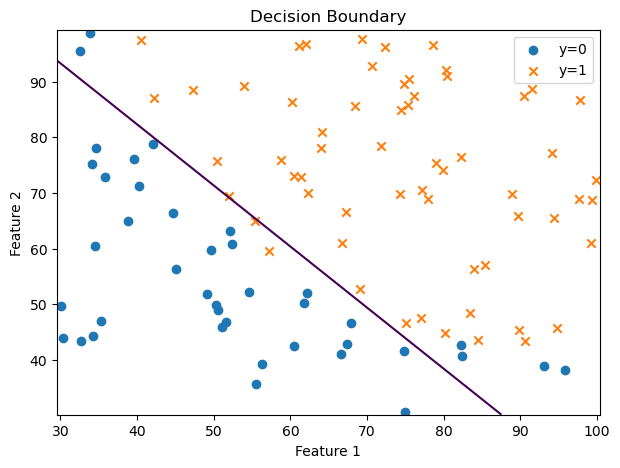

In [64]:
plot_decision_boundary(x_train, y_train, w, b)

In [69]:
def predict(X,w,b):

    m,n=X.shape
    p=np.zeros(m)

    for i in range(m):
        f_wb_i = sigmoid(np.dot(w,X[i])+b)

        if f_wb_i >=0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p


In [70]:
#Checking accuracy

p = predict(x_train,w,b)

print("accuracy =", np.mean(p==y_train)*100)

accuracy = 92.0
